<a href="https://colab.research.google.com/github/ikbalsingh/cs276/blob/main/QuestionF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link Prediction on a movie graph

The graph contains movies as nodes and two nodes(movies) are connected to each other if they are directed by the same director.

#### Download the dataset

In [ ]:
import requests
import zipfile
import os

def download_and_extract_zip(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Request was successful, save the content to a local .zip file
        with open("downloaded_file.zip", "wb") as file:
            file.write(response.content)

        # Extract the .zip file
        with zipfile.ZipFile("downloaded_file.zip", 'r') as zip_ref:
            zip_ref.extractall("C:\\Users\\admin\\Downloads\\276\\data")  # Extract the contents of the zip file to the current directory

        # Remove the downloaded .zip file
        os.remove("downloaded_file.zip")

        print(f"File extracted and saved.")
    else:
        print(f"Failed to download the .zip file. Status code: {response.status_code}")

# Usage
download_and_extract_zip("http://mozart.diei.unipg.it/gdcontest/contest2021/data/uploads/movie_remakes.zip")


File extracted and saved.


In [ ]:
import pandas as pd
remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_edges_df

C:\Users\admin\Downloads\276\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,director_original,director_remake,title_original,year_original,title_remake,year_remake
0,1,86,Don Juan,1926,Adventures of Don Juan,1948
1,48,46,Pépé le Moko,1937,Algiers,1938
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005
4,37,30,Little Mother,1935,Bachelor Mother,1939
...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966
98,32,21,The Women,1939,The Women,2008
99,32,17,The Women,1939,The Opposite Sex,1956
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955


In [ ]:
import pandas
remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_nodes_df

C:\Users\admin\Downloads\276\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name
0,1,Alan Crosland
1,2,Alfred Hitchcock
2,3,Andrew Davis
3,4,Andrew Grieve
4,5,Anthony Asquith
...,...,...
86,87,W. S. Van Dyke
87,88,Wilhelm Thiele
88,89,William A. Wellman
89,90,William Nigh


In [ ]:
movies_with_years_df = remakes_edges_df.copy()  # Create a copy of the original DataFrame

# Combine 'title_original' and 'year_original' into a new column
movies_with_years_df['original_title_and_year'] = movies_with_years_df['title_original'] + ' (' + movies_with_years_df['year_original'].astype(str) + ')'
movies_with_years_df['remake_title_and_year'] = movies_with_years_df['title_remake'] + ' (' + movies_with_years_df['year_remake'].astype(str) + ')'

movies_with_years_df

,director_original,director_remake,title_original,year_original,title_remake,year_remake,original_title_and_year,remake_title_and_year
0,1,86,Don Juan,1926,Adventures of Don Juan,1948,Don Juan (1926),Adventures of Don Juan (1948)
1,48,46,Pépé le Moko,1937,Algiers,1938,Pépé le Moko (1937),Algiers (1938)
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979,All Quiet on the Western Front (1930),All Quiet on the Western Front (1979)
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005,Assault on Precinct 13 (1976),Assault on Precinct 13 (2005)
4,37,30,Little Mother,1935,Bachelor Mother,1939,Little Mother (1935),Bachelor Mother (1939)
...,...,...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966,The More the Merrier (1943),Walk Don't Run (1966)
98,32,21,The Women,1939,The Women,2008,The Women (1939),The Women (2008)
99,32,17,The Women,1939,The Opposite Sex,1956,The Women (1939),The Opposite Sex (1956)
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955,The Major and the Minor (1942),You're Never Too Young (1955)


#### Graph creation
The graph contains movies as nodes and two nodes(movies) are connected to each other if they are directed by the same director.

In [ ]:
import networkx as nx

# Create a NetworkX graph
G = nx.Graph()

# Add nodes for movies
for index, row in movies_with_years_df.iterrows():
    G.add_node(row['original_title_and_year'], label=row['original_title_and_year'])
    G.add_node(row['remake_title_and_year'], label=row['remake_title_and_year'])

director_movie_mapping = {}
names = {}
# Add edges for movies directed by the same director
for id, name in zip(remakes_nodes_df['id'],remakes_nodes_df['name']):
    names[id] = name
    director_movie_mapping[id] = set()
    for index, row in movies_with_years_df.iterrows():
        if row['director_original'] == id:
            director_movie_mapping[id].add( row['original_title_and_year'])
        if row['director_remake'] == id:
            director_movie_mapping[id].add( row['remake_title_and_year'])

for key, value in director_movie_mapping.items():
    if(len(value) > 1):
        for i in value:
            for k in value:
               if i!= k:
                  G.add_edge(i,k, label=names[key])

C:\Users\admin\Downloads\276\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


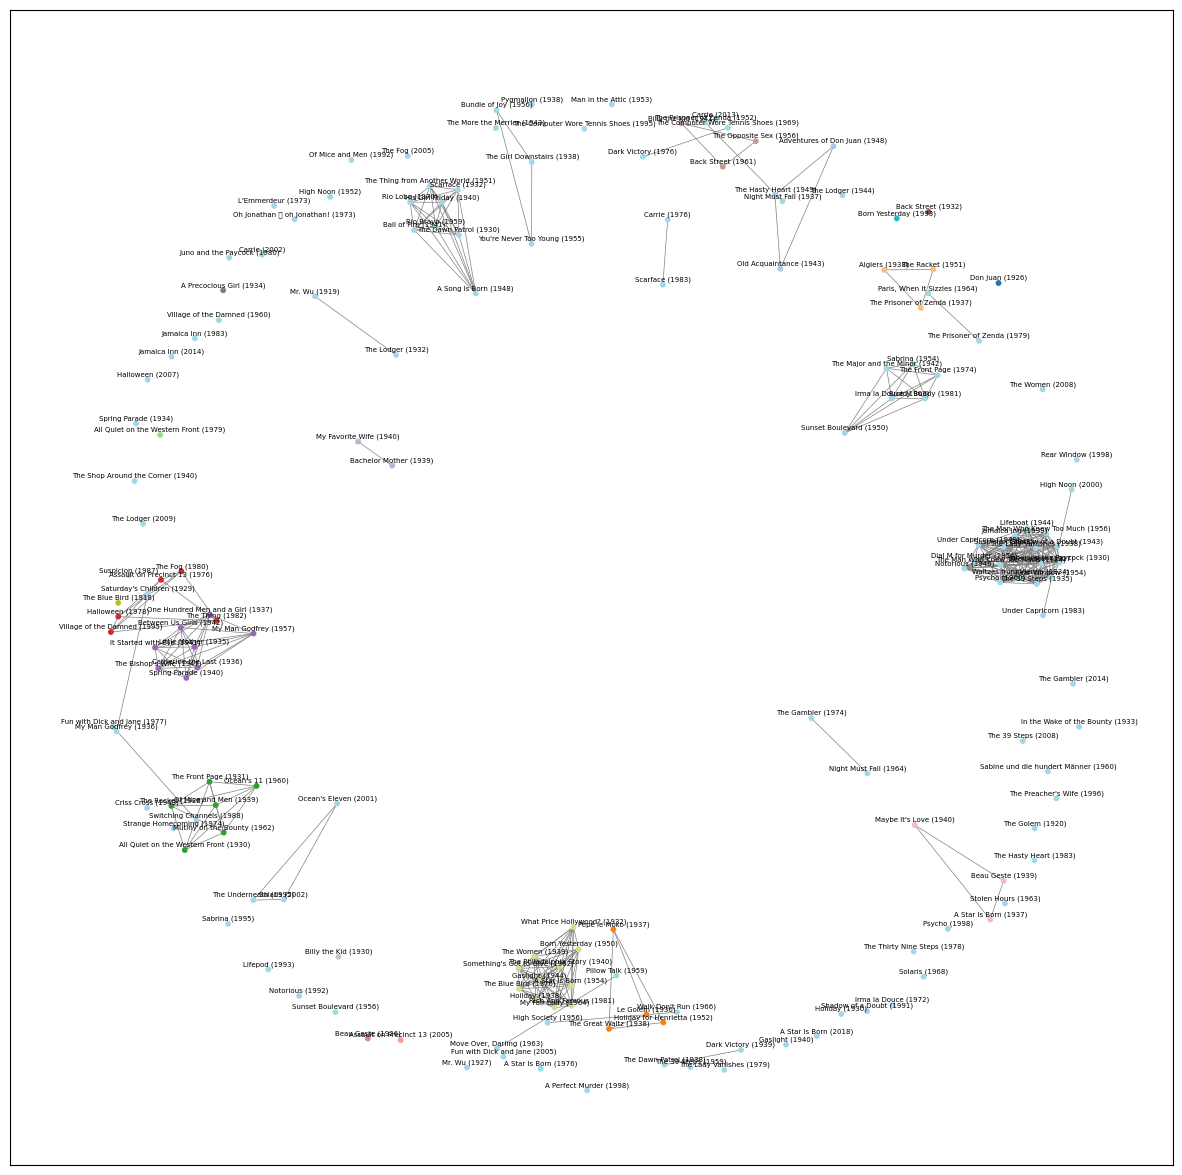

In [ ]:
import matplotlib.pyplot as plt

def plot_graph_networkx(G, pos, node_size=10, node_label_size = 5, show_edge_labels = False, edge_label_size=4):
    # node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
    ax = plt.gca()
    ax.set_facecolor('white')

    # Define a colormap for coloring components
    cmap = plt.get_cmap('tab20')

    components = list(nx.connected_components(G))

    # Create a dictionary to map nodes to colors
    node_colors = {}
    for i, component in enumerate(components):
        color = cmap(i % 87)  # You can adjust the number of colors as needed
        for node in component:
            node_colors[node] = color

    # Draw nodes with desired node color
    # nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color = [node_colors[node] for node in G.nodes()])

    # Draw edges with a specific edge width and color
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')

    # Add labels for nodes
    node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, {k: (x, y + 0.01) for k, (x, y) in pos.items()}, font_size=node_label_size)

    # # Add labels for edges
    if show_edge_labels:
        edge_labels = {(u, v): data.get("label", "") for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_label_size, font_color='red')

    # Turn off axis labels and display the plot
    ax.set_xticks([])  # Turn off x-axis labels
    ax.set_yticks([])  # Turn off y-axis labels
    plt.show()

pos = nx.spring_layout(G, k=0.5,iterations=100)
plot_graph_networkx(G, pos)

# pos = nx.spring_layout(G)

In [ ]:
import stellargraph as sg

In [ ]:
import matplotlib.pyplot as plt
from math import isclose
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from collections import Counter
import multiprocessing
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
graph = sg.StellarGraph.from_networkx(G)

In [ ]:
print(graph.info())

StellarGraph: Undirected multigraph
 Nodes: 168, Edges: 308

 Node types:
  You're Never Too Young (1955): [1]
    Features: none
    Edge types: You're Never Too Young (1955)-Norman Taurog->Bundle of Joy (1956), You're Never Too Young (1955)-Norman Taurog->The Girl Downstairs (1938)
  What Price Hollywood? (1932): [1]
    Features: none
    Edge types: What Price Hollywood? (1932)-George Cukor->A Star Is Born (1954), What Price Hollywood? (1932)-George Cukor->Born Yesterday (1950), What Price Hollywood? (1932)-George Cukor->Gaslight (1944), What Price Hollywood? (1932)-George Cukor->Holiday (1938), What Price Hollywood? (1932)-George Cukor->My Fair Lady (1964), ... (5 more)
  Waltzes from Vienna (1934): [1]
    Features: none
    Edge types: Waltzes from Vienna (1934)-Alfred Hitchcock->Dial M for Murder (1954), Waltzes from Vienna (1934)-Alfred Hitchcock->Jamaica Inn (1939), Waltzes from Vienna (1934)-Alfred Hitchcock->Juno and the Paycock (1930), Waltzes from Vienna (1934)-Alfred Hit

## Construct splits of the input data

We have to carefully split the data to avoid data leakage and evaluate the algorithms correctly:

* For computing node embeddings, a **Train Graph** (`graph_train`)
* For training classifiers, a classifier **Training Set** (`examples_train`) of positive and negative edges that weren't used for computing node embeddings
* For choosing the best classifier, an **Model Selection Test Set** (`examples_model_selection`) of positive and negative edges that weren't used for computing node embeddings or training the classifier
* For the final evaluation, a **Test Graph** (`graph_test`) to compute test node embeddings with more edges than the Train Graph, and a **Test Set** (`examples_test`) of positive and negative edges not used for neither computing the test node embeddings or for classifier training or model selection

###  Test Graph

We begin with the full graph and use the `EdgeSplitter` class to produce:

* Test Graph
* Test set of positive/negative link examples

The Test Graph is the reduced graph we obtain from removing the test set of links from the full graph.

In [ ]:
# Define an edge splitter on the original graph:
edge_splitter_test = EdgeSplitter(graph)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from graph, and obtain the
# reduced graph graph_test with the sampled links removed:
graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(
    p=0.2, method="global"
)

print(graph_test.info())

** Sampled 61 positive and 61 negative edges. **
StellarGraph: Undirected multigraph
 Nodes: 168, Edges: 247

 Node types:
  You're Never Too Young (1955): [1]
    Features: none
    Edge types: You're Never Too Young (1955)-Norman Taurog->Bundle of Joy (1956)
  What Price Hollywood? (1932): [1]
    Features: none
    Edge types: What Price Hollywood? (1932)-George Cukor->A Star Is Born (1954), What Price Hollywood? (1932)-George Cukor->Gaslight (1944), What Price Hollywood? (1932)-George Cukor->My Fair Lady (1964), What Price Hollywood? (1932)-George Cukor->Rich And Famous (1981), What Price Hollywood? (1932)-George Cukor->Something's Got to Give (1962), ... (2 more)
  Waltzes from Vienna (1934): [1]
    Features: none
    Edge types: Waltzes from Vienna (1934)-Alfred Hitchcock->Jamaica Inn (1939), Waltzes from Vienna (1934)-Alfred Hitchcock->Juno and the Paycock (1930), Waltzes from Vienna (1934)-Alfred Hitchcock->Lifeboat (1944), Waltzes from Vienna (1934)-Alfred Hitchcock->Notoriou

### Train Graph

This time, we use the `EdgeSplitter` on the Test Graph, and perform a train/test split on the examples to produce:

* Train Graph
* Training set of link examples
* Set of link examples for model selection


In [ ]:
# Do the same process to compute a training subset from within the test graph
edge_splitter_train = EdgeSplitter(graph_test, graph)
graph_train, examples, labels = edge_splitter_train.train_test_split(
    p=0.2, method="global"
)
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(examples, labels, train_size=0.75, test_size=0.25)

print(graph_train.info())

** Sampled 49 positive and 49 negative edges. **
StellarGraph: Undirected multigraph
 Nodes: 168, Edges: 198

 Node types:
  You're Never Too Young (1955): [1]
    Features: none
    Edge types: You're Never Too Young (1955)-Norman Taurog->Bundle of Joy (1956)
  What Price Hollywood? (1932): [1]
    Features: none
    Edge types: What Price Hollywood? (1932)-George Cukor->A Star Is Born (1954), What Price Hollywood? (1932)-George Cukor->Gaslight (1944), What Price Hollywood? (1932)-George Cukor->My Fair Lady (1964), What Price Hollywood? (1932)-George Cukor->Rich And Famous (1981), What Price Hollywood? (1932)-George Cukor->Something's Got to Give (1962), ... (2 more)
  Waltzes from Vienna (1934): [1]
    Features: none
    Edge types: Waltzes from Vienna (1934)-Alfred Hitchcock->Jamaica Inn (1939), Waltzes from Vienna (1934)-Alfred Hitchcock->Juno and the Paycock (1930), Waltzes from Vienna (1934)-Alfred Hitchcock->Lifeboat (1944), Waltzes from Vienna (1934)-Alfred Hitchcock->Notoriou

In [ ]:
pd.DataFrame(
    [
        (
            "Training Set",
            len(examples_train),
            "Train Graph",
            "Test Graph",
            "Train the Link Classifier",
        ),
        (
            "Model Selection",
            len(examples_model_selection),
            "Train Graph",
            "Test Graph",
            "Select the best Link Classifier model",
        ),
        (
            "Test set",
            len(examples_test),
            "Test Graph",
            "Full Graph",
            "Evaluate the best Link Classifier",
        ),
    ],
    columns=("Split", "Number of Examples", "Hidden from", "Picked from", "Use"),
).set_index("Split")

,Number of Examples,Hidden from,Picked from,Use
Split,,,,
Training Set,73,Train Graph,Test Graph,Train the Link Classifier
Model Selection,25,Train Graph,Test Graph,Select the best Link Classifier model
Test set,122,Test Graph,Full Graph,Evaluate the best Link Classifier


## Node2Vec

We use Node2Vec, to calculate node embeddings. These embeddings are learned in such a way to ensure that nodes that are close in the graph remain close in the embedding space. Node2Vec first involves running random walks on the graph to obtain our context pairs, and using these to train a Word2Vec model.

These are the set of parameters we can use:

* `p` - Random walk parameter "p"
* `q` - Random walk parameter "q"
* `dimensions` - Dimensionality of node2vec embeddings
* `num_walks` - Number of walks from each node
* `walk_length` - Length of each random walk
* `window_size` - Context window size for Word2Vec
* `num_iter` - number of SGD iterations (epochs)
* `workers` - Number of workers for Word2Vec

In [ ]:
p = 1.0
q = 1.0
dimensions = 128
num_walks = 10
walk_length = 80
window_size = 10
num_iter = 1
workers = multiprocessing.cpu_count()

In [ ]:
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec


def node2vec_embedding(graph, name):
    rw = BiasedRandomWalk(graph)
    walks = rw.run(graph.nodes(), n=num_walks, length=walk_length, p=p, q=q)
    print(f"Number of random walks for '{name}': {len(walks)}")

    model = Word2Vec(
        walks,
        size=dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=workers
    )

    def get_embedding(u):
        return model.wv[u]

    return get_embedding

In [ ]:
embedding_train = node2vec_embedding(graph_train, "Train Graph")

Number of random walks for 'Train Graph': 1680


## Train and evaluate the link prediction model

There are a few steps involved in using the Word2Vec model to perform link prediction:
1. We calculate link/edge embeddings for the positive and negative edge samples by applying a binary operator on the embeddings of the source and target nodes of each sampled edge.
2. Given the embeddings of the positive and negative examples, we train a logistic regression classifier to predict a binary value indicating whether an edge between two nodes should exist or not.
3. We evaluate the performance of the link classifier for each of the 4 operators on the training data with node embeddings calculated on the **Train Graph** (`graph_train`), and select the best classifier.
4. The best classifier is then used to calculate scores on the test data with node embeddings calculated on the **Test Graph** (`graph_test`).

Below are a set of helper functions that let us repeat these steps for each of the binary operators.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]


# 2. training classifier
def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator
):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_roc_auc(clf, link_features_test, link_labels_test)
    return score


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

We consider 4 different operators:

* *Hadamard*
* $L_1$
* $L_2$
* *average*

The paper [[1]](#refs) provides a detailed description of these operators. All operators produce link embeddings that have equal dimensionality to the input node embeddings (128 dimensions for our example).

In [ ]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


def run_link_prediction(binary_operator):
    clf = train_link_prediction_model(
        examples_train, labels_train, embedding_train, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_model_selection,
        labels_model_selection,
        embedding_train,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [ ]:
results = [run_link_prediction(op) for op in binary_operators]
best_result = max(results, key=lambda result: result["score"])

print(f"Best result from '{best_result['binary_operator'].__name__}'")

pd.DataFrame(
    [(result["binary_operator"].__name__, result["score"]) for result in results],
    columns=("name", "ROC AUC score"),
).set_index("name")

Best result from 'operator_l2'


,ROC AUC score
name,
operator_hadamard,0.653846
operator_l1,0.852564
operator_l2,0.858974
operator_avg,0.679487


### Evaluate the best model using the test set

Now that we've trained and selected our best model, we use a test set of embeddings and calculate a final evaluation score.

In [ ]:
embedding_test = node2vec_embedding(graph_test, "Test Graph")

Number of random walks for 'Test Graph': 1680


In [ ]:
test_score = evaluate_link_prediction_model(
    best_result["classifier"],
    examples_test,
    labels_test,
    embedding_test,
    best_result["binary_operator"],
)
print(
    f"ROC AUC score on test set using '{best_result['binary_operator'].__name__}': {test_score}"
)

ROC AUC score on test set using 'operator_l2': 0.7927976350443429


### Visualise representations of link embeddings

Learned link embeddings have 128 dimensions but for visualisation we project them down to 2 dimensions using the PCA algorithm.

Blue points represent positive edges and red points represent negative (no edge should exist between the corresponding vertices) edges.

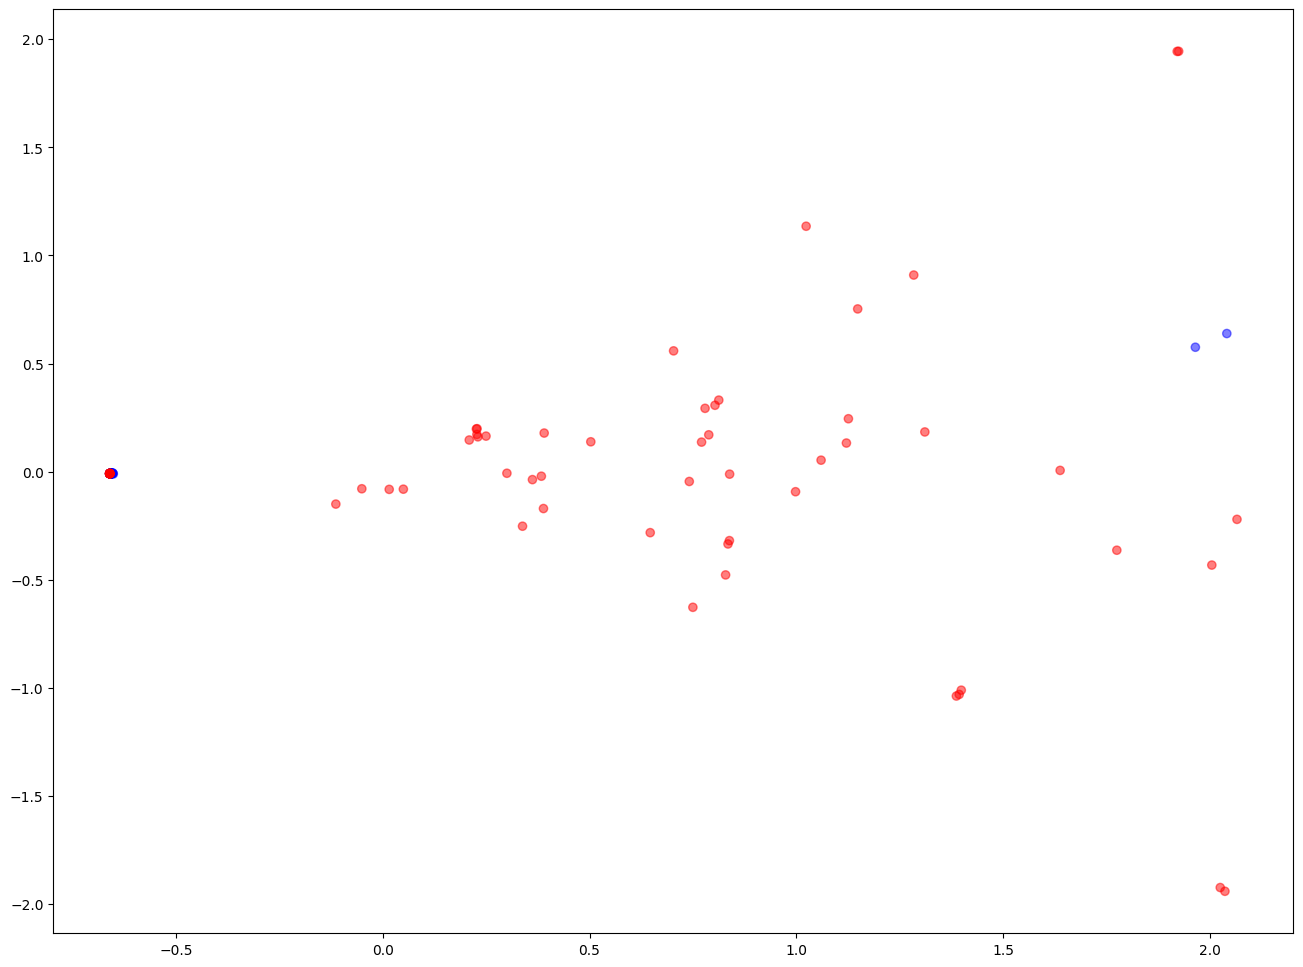

In [ ]:
# Calculate edge features for test data
link_features = link_examples_to_features(
    examples_test, embedding_test, best_result["binary_operator"]
)

# Learn a projection from 128 dimensions to 2
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(link_features)

# plot the 2-dimensional points
plt.figure(figsize=(16, 12))
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=np.where(labels_test == 1, "b", "r"),
    alpha=0.5,
)